# Linear Regression

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set_theme()

In [18]:
df = pd.read_csv('D:/Study/UHD/6.Spring 2022/data 4319 final project/Major Project/1. Explore Data/df_workfile.csv')
# df.info()
df.drop(columns=df.columns[0], axis=1, inplace=True)

df.head()

,diagnosis,concave points_mean,concavity_mean,concave points_worst,compactness_mean,perimeter_worst,concavity_worst,radius_worst,perimeter_mean,area_worst,area_mean,fractal_dimension_mean
0,M,0.14710,0.3001,0.2654,0.27760,184.60,0.7119,25.38,122.80,2019.0,1001.0,0.07871
1,M,0.07017,0.0869,0.1860,0.07864,158.80,0.2416,24.99,132.90,1956.0,1326.0,0.05667
2,M,0.12790,0.1974,0.2430,0.15990,152.50,0.4504,23.57,130.00,1709.0,1203.0,0.05999
3,M,0.10520,0.2414,0.2575,0.28390,98.87,0.6869,14.91,77.58,567.7,386.1,0.09744
4,M,0.10430,0.1980,0.1625,0.13280,152.20,0.4000,22.54,135.10,1575.0,1297.0,0.05883


In [19]:
benign = df[df.diagnosis == 'B']
malignant = df[df.diagnosis == 'M']

Text(0.5, 1.0, 'Linearly Data')

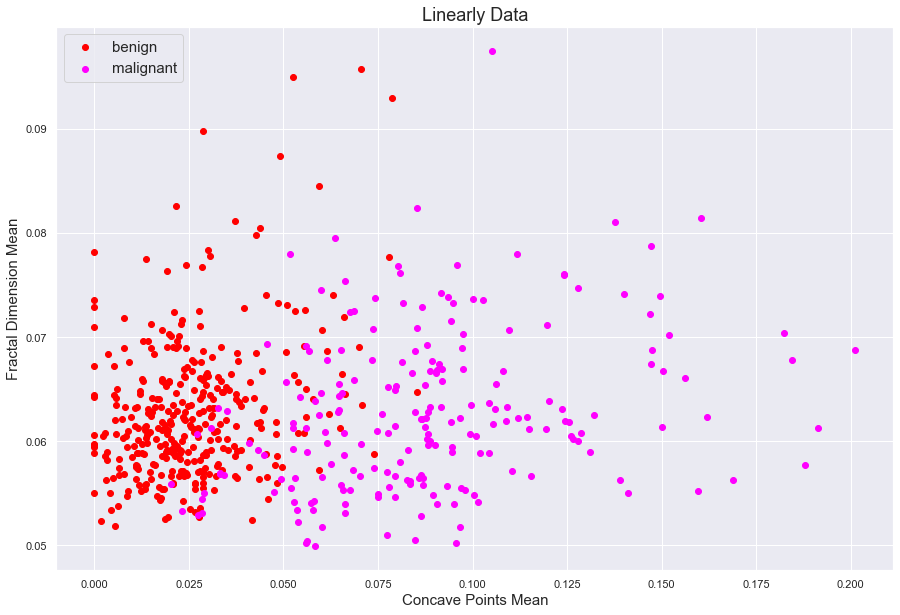

In [20]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15,10))

ax1.scatter(benign['concave points_mean'], 
            benign['fractal_dimension_mean'], 
            color = "red", 
            label = "benign")
ax1.scatter(malignant['concave points_mean'], 
            malignant['fractal_dimension_mean'], 
            color = "magenta", 
            label = "malignant")
ax1.set_xlabel("Concave Points Mean", fontsize = 15)
ax1.set_ylabel("Fractal Dimension Mean", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Data", fontsize = 18)

In [21]:
X = df['concave points_mean'].values
X = X.reshape(-1,1)
y = df['fractal_dimension_mean'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Building a Machine Learning Linear Regression

1. Build a class *SingleNeuron* contain the function of the Linear Regression to train the dataset, also we build the predict function in this class for later we can use it to predict the data to test how well the model work after training.

In [22]:
class SingleNeuron(object):
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


2. In order to give instance the *SingleNeuron* model, we have to define the activation function which is *Linear Regression* (Because Build LR SingleNeuron is the goal)

In [23]:
def linear_activation(z):
    return z

3. Now we can calling *SingleNeuron* and train the model

In [24]:
lm_model = SingleNeuron(linear_activation)
lm_model.train(X_train, y_train, alpha = 0.0001, epochs = 5000)

4. After training the model, we call the predict method to see how well the model work.

In [25]:
predictions = lm_model.predict(X_test.reshape(-1,1))

5. It is time to visualize the Linear Regression Model and we can also visualize the loss/ error of each epoch we run in the model

Text(0.5, 1.0, 'Linearly Data')

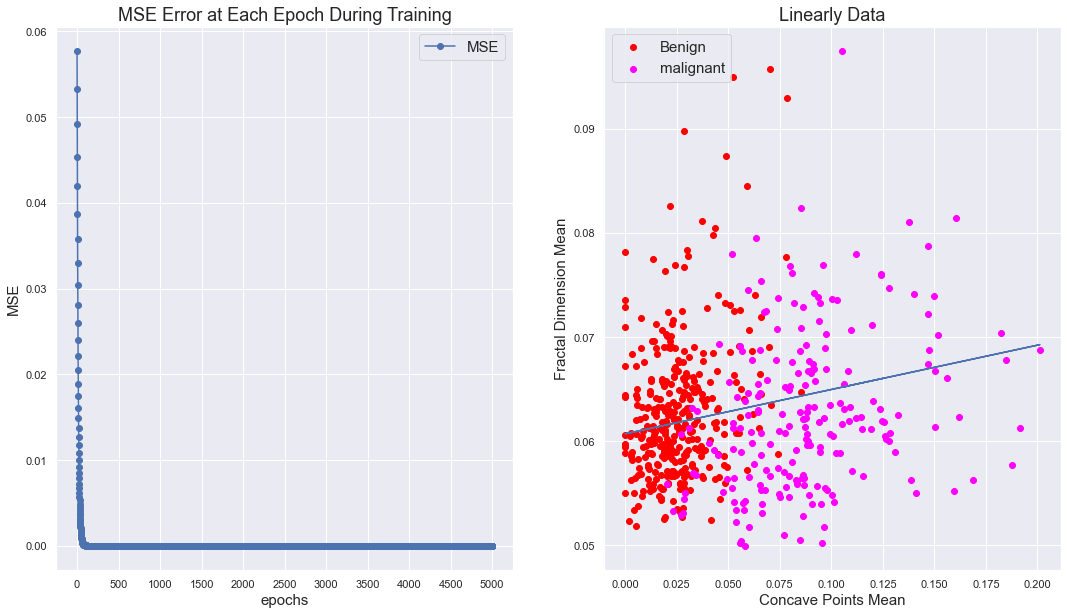

In [26]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(18,10))
ax1.plot(range(1, len(lm_model.errors_) + 1), 
         lm_model.errors_,
         marker = "o",
         label = "MSE")
ax1.set_xlabel("epochs", fontsize = 15)
ax1.set_ylabel("MSE", fontsize = 15)
ax1.set_xticks(range(0, len(lm_model.errors_) + 1, 500))
ax1.legend(fontsize = 15)
ax1.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

ax2.scatter(benign['concave points_mean'], 
            benign['fractal_dimension_mean'], 
            color = "red", 
            label = "Benign")
ax2.scatter(malignant['concave points_mean'], 
            malignant['fractal_dimension_mean'], 
            color = "magenta", 
            label = "malignant")
ax2.plot(X_test, predictions)
ax2.set_xlabel("Concave Points Mean", fontsize = 15)
ax2.set_ylabel("Fractal Dimension Mean", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Linearly Data", fontsize = 18)



---
## Linear Regression - Scikit Learn

In [27]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
predictions = LR_model.predict(X_test)

Text(0.5, 1.0, 'Linearly Data')

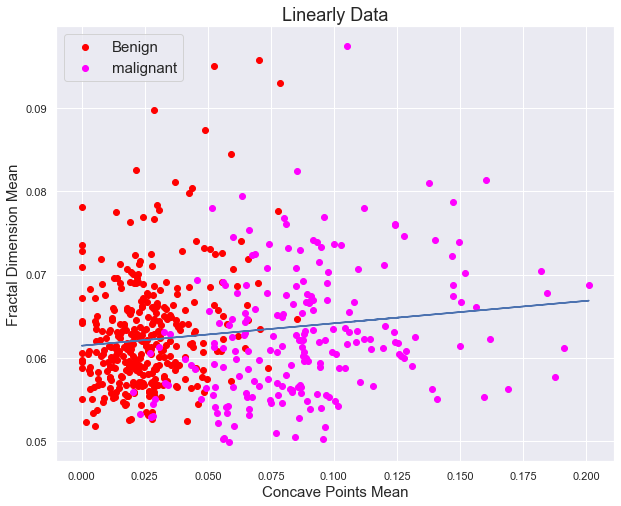

In [28]:
plt.figure(figsize = (10, 8))
plt.scatter(benign['concave points_mean'], 
            benign['fractal_dimension_mean'], 
            color = "red", 
            label = "Benign")
plt.scatter(malignant['concave points_mean'], 
            malignant['fractal_dimension_mean'], 
            color = "magenta", 
            label = "malignant")
plt.plot(X_test, predictions)
plt.xlabel("Concave Points Mean", fontsize = 15)
plt.ylabel("Fractal Dimension Mean", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Linearly Data", fontsize = 18)